#### Importing Pandas package from python site packages

In [350]:
##Import pandas package##
import pandas as pd

## Step 1: Data Collection from flat file using Pandas read_csv command

In [351]:
mydata=pd.read_csv(r'train.csv')

mydata is now a **DataFrame: Two-dimensional, size-mutable, potentially heterogeneous tabular data.**

Data structure also contains labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure.

You can also read excel file, json, text file & many more format in pandas just check out the documentation 
**Explore the data with head command, head give your 5 rows of the dataset**

In [352]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

**info()** function Print a concise summary of a DataFrame.

This method/function prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

## Step 2: Data Transformation

if you look at your **Date.of.Birth** its a string, lets change it datetime format
mydata['Date.of.Birth'] 

**type()** function in python lets you know the metadata or attribute information of the variable

In [353]:
type(mydata['Date.of.Birth'][0])

str

**pd.to_datetime()** help you in assembling a datetime from multiple columns of a DataFrame. The keys can be common abbreviations like [‘year’, ‘month’, ‘day’, ‘minute’, ‘second’, ‘ms’, ‘us’, ‘ns’]) or plurals of the same

In [354]:
mydata['Date.of.Birth']=pd.to_datetime(mydata['Date.of.Birth'])

In [355]:
type(mydata['Date.of.Birth'][0])

pandas._libs.tslibs.timestamps.Timestamp

you can extract the **day**, **month**, **year** by passing the key words in the  mydata['Date.of.Birth'].dt. function

In [356]:
mydata['Date.of.Birth'].dt.month

0          1
1          7
2          8
3         12
4          9
          ..
233149     1
233150     5
233151     1
233152     3
233153     2
Name: Date.of.Birth, Length: 233154, dtype: int64

In [357]:
mydata['Date.of.Birth']=pd.to_datetime(mydata['DisbursalDate'])

The feature **CREDIT.HISTORY.LENGTH** columns has numerical and string values attached together computer cannot understand this data lets convert it reable format

In [358]:
mydata['CREDIT.HISTORY.LENGTH'].head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     1yrs 3mon
4     0yrs 0mon
Name: CREDIT.HISTORY.LENGTH, dtype: object

Lets build an userdefined function to extract values of years & Months and convert into uniform measurement(Months)
Ex: "1yrs 11mon" has to transformed 12+11=33 months 

In [359]:
def String_to_months(date):
    list_yrs_mon=date.split()
    year,month=list_yrs_mon[0][:-3],list_yrs_mon[1][:-3]
    c_months=int(year)*12+int(month)
    return c_months

How this function works??? see this 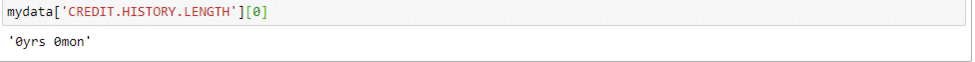

In [360]:
mydata['CREDIT.HISTORY.LENGTH.MONTHS']=mydata['CREDIT.HISTORY.LENGTH'].apply(String_to_months)

# Task -1
Transform the column "AVERAGE.ACCT.AGE" simialr to CREDIT.HISTORY.LENGTH.MONTHS

In [361]:
mydata['AVERAGE.ACCT.AGE']=mydata['AVERAGE.ACCT.AGE'].apply(String_to_months)

## Step:3 Check for Missing Values & Subsetting the Data

#### As you can see their is a lot of columns & rows in the dataset, let's start by subsetting the dataset 
##### Subset Variables (Columns)
define a list of columns of which are interest for our Customer analysis task 

*Note: your free to add more columns*

In [362]:
list_columns=['disbursed_amount','asset_cost','Employment.Type','MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag']

now let's subset operation

In [363]:
customer_info=mydata[list_columns]

### check for missing value
**isnull** or **isna** are functions available. 
read more on documentation to know the difference 

In [364]:
customer_info.isnull()

,disbursed_amount,asset_cost,Employment.Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
233149,False,False,False,False,False,False,False,False,False
233150,False,False,False,False,False,False,False,False,False
233151,False,False,False,False,False,False,False,False,False
233152,False,False,False,False,False,False,False,False,False


the isnull or isna returns boolen result to count we will pass sum method 

In [365]:
customer_info.isnull().sum()

disbursed_amount        0
asset_cost              0
Employment.Type      7661
MobileNo_Avl_Flag       0
Aadhar_flag             0
PAN_flag                0
VoterID_flag            0
Driving_flag            0
Passport_flag           0
dtype: int64

you can see the function **isnull().sum()** is shows a result of columns & count of missing values.

**Employment.Type has 7661 missing values** lets now fill them with **fillna** method in python


## strategy for missing values
- Imputation Method 1:Replace NA with a scalar value
- Imputation Method 2:Mean
- Imputation Method 3:Median
- Imputation Method 4:Mode

**Imputation Method 1:** we will impute with a value: of ***Salaried***

In [366]:
customer_info['Employment.Type']=customer_info['Employment.Type'].fillna('Salaried')

/tmp/ipykernel_2511359/2829450466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_info['Employment.Type']=customer_info['Employment.Type'].fillna('Salaried')


In [367]:
customer_info['Employment.Type']

0              Salaried
1         Self employed
2         Self employed
3         Self employed
4         Self employed
              ...      
233149         Salaried
233150    Self employed
233151         Salaried
233152         Salaried
233153         Salaried
Name: Employment.Type, Length: 233154, dtype: object

In [368]:
customer_info.isnull().sum()

disbursed_amount     0
asset_cost           0
Employment.Type      0
MobileNo_Avl_Flag    0
Aadhar_flag          0
PAN_flag             0
VoterID_flag         0
Driving_flag         0
Passport_flag        0
dtype: int64

In [369]:
customer_info=mydata[list_columns]

Imputation Method 4 Impute with modal value of the categorical values in the place of ##Fix ME##

In [370]:
customer_info['Employment.Type'].fillna(mydata['Employment.Type'].mode())

0              Salaried
1         Self employed
2         Self employed
3         Self employed
4         Self employed
              ...      
233149         Salaried
233150    Self employed
233151         Salaried
233152         Salaried
233153         Salaried
Name: Employment.Type, Length: 233154, dtype: object

## Subsetting the Data with condition 

we can subset the data with a condition, now lets see how many customer are having a loan amount disbursed more than 30000

In [371]:
mydata['disbursed_amount']>30000

0         True
1         True
2         True
3         True
4         True
          ... 
233149    True
233150    True
233151    True
233152    True
233153    True
Name: disbursed_amount, Length: 233154, dtype: bool

The above line returns a boolen result now lets pass this boolen result onto a DataFrame to get our data. 

In [372]:
mydata[mydata['disbursed_amount']>30000]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,CREDIT.HISTORY.LENGTH.MONTHS
0,420825,50578,58400,89.55,67,22807,45,1441,2018-03-08,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,2018-09-26,Self employed,...,0,1991,0,0,1,23,1yrs 11mon,0,1,23
2,417566,53278,61360,89.63,67,22807,45,1497,2018-01-08,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,2018-10-26,Self employed,...,0,31,0,0,0,8,1yrs 3mon,1,1,15
4,539055,52378,60300,88.39,67,22807,45,1495,2018-09-26,Self employed,...,0,0,0,0,0,0,0yrs 0mon,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,2018-10-26,Salaried,...,0,4084,0,0,0,21,3yrs 3mon,0,0,39
233150,606141,73651,100600,74.95,34,23775,51,990,2018-10-23,Self employed,...,0,1565,0,0,0,6,0yrs 6mon,0,0,6
233151,613658,33484,71212,48.45,77,22186,86,2299,2018-10-24,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,2018-09-29,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0,0,0


we can apply multiple conditions to subset our data, to do this we can use by applying AND, OR conditions an example is show below where we trying to subset the data with respect to the amount disbured & Employment Type

In [373]:
mydata[mydata['disbursed_amount']>30000]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,CREDIT.HISTORY.LENGTH.MONTHS
0,420825,50578,58400,89.55,67,22807,45,1441,2018-03-08,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,2018-09-26,Self employed,...,0,1991,0,0,1,23,1yrs 11mon,0,1,23
2,417566,53278,61360,89.63,67,22807,45,1497,2018-01-08,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,2018-10-26,Self employed,...,0,31,0,0,0,8,1yrs 3mon,1,1,15
4,539055,52378,60300,88.39,67,22807,45,1495,2018-09-26,Self employed,...,0,0,0,0,0,0,0yrs 0mon,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,2018-10-26,Salaried,...,0,4084,0,0,0,21,3yrs 3mon,0,0,39
233150,606141,73651,100600,74.95,34,23775,51,990,2018-10-23,Self employed,...,0,1565,0,0,0,6,0yrs 6mon,0,0,6
233151,613658,33484,71212,48.45,77,22186,86,2299,2018-10-24,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,2018-09-29,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0,0,0


In [374]:
mydata[(mydata['disbursed_amount']>30000) & (mydata['Employment.Type']=='Salaried')]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,CREDIT.HISTORY.LENGTH.MONTHS
0,420825,50578,58400,89.55,67,22807,45,1441,2018-03-08,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,2018-09-23,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,2018-09-16,Salaried,...,0,0,0,0,0,2,0yrs 2mon,0,0,2
9,510980,52603,61300,86.95,67,22807,45,1492,2018-09-16,Salaried,...,0,2608,0,0,0,19,1yrs 7mon,0,0,19
11,486821,64769,74190,89.23,67,22807,45,1446,2018-03-09,Salaried,...,0,0,0,0,0,25,2yrs 3mon,1,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233148,613494,42894,60334,72.93,34,20700,48,1051,2018-10-24,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0,0,0
233149,626432,63213,105405,60.72,34,20700,48,1050,2018-10-26,Salaried,...,0,4084,0,0,0,21,3yrs 3mon,0,0,39
233151,613658,33484,71212,48.45,77,22186,86,2299,2018-10-24,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,2018-09-29,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0,0,0


## Subsetting the Data according to Data types
Lets pull categorical features into a separate dataframe

In [375]:
cat_mydata=mydata.select_dtypes(include='object')
cat_mydata.head()

,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,CREDIT.HISTORY.LENGTH
0,Salaried,03-08-18,No Bureau History Available,0yrs 0mon
1,Self employed,26-09-18,I-Medium Risk,1yrs 11mon
2,Self employed,01-08-18,No Bureau History Available,0yrs 0mon
3,Self employed,26-10-18,L-Very High Risk,1yrs 3mon
4,Self employed,26-09-18,No Bureau History Available,0yrs 0mon


Lets drop the columns **AVERAGE.ACCT.AGE**	**CREDIT.HISTORY.LENGTH** from the cat_mydata as we have already transformed it in step 2

In [376]:
cat_mydata=cat_mydata.drop(columns='CREDIT.HISTORY.LENGTH',axis=1)

## Step 4: Descriptive statistics
Lets us start a our data analysis journey with finding out **Mean, Median, Mode, Max, Min, Standard Deviation and quartile values**
- The "mean" is the "average" you're used to, where you add up all the numbers and then divide by the number of numbers. 
- The "median" is the "middle" value in the list of numbers. To find the median, your numbers have to be listed in numerical order from smallest to largest, so you may have to rewrite your list before you can find the median. 
- The "mode" is the value that occurs most often. If no number in the list is repeated, then there is no mode for the list.
- Quartiles in statistics are values that divide your data into quarters. However, quartiles aren’t shaped like pizza slices; Instead they divide your data into four segments according to where the numbers fall on the number line. 
    -The four quarters that divide a data set into quartiles are:

    - The lowest 25% of numbers.
    - The next lowest 25% of numbers (up to the median).
    - The second highest 25% of numbers (above the median).
    - The highest 25% of numbers.

In [377]:
mydata.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,NO.OF_INQUIRIES,loan_default,CREDIT.HISTORY.LENGTH.MONTHS
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,8.915764,0.206615,0.217071,16.252404
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,15.106416,0.706498,0.412252,28.581255
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,13.000000,0.000000,0.000000,24.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,369.000000,36.000000,1.000000,468.000000


Categorical variables are excluded in this data summary so we need use value_counts method

In [378]:
cat_mydata['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [379]:
#cat_mydata['Employment.Type'].value_counts()

#### The dataset has Date.of.Birth column from which Age of the customer can be derived w.r.t the current date.
This is known as Derived columns

In [380]:
pd.to_datetime('now')

Timestamp('2022-08-26 19:06:23.760452')

In [381]:
(pd.to_datetime('now')-mydata['Date.of.Birth']).astype('<m8[Y]')

0         4.0
1         3.0
2         4.0
3         3.0
4         3.0
         ... 
233149    3.0
233150    3.0
233151    3.0
233152    3.0
233153    3.0
Name: Date.of.Birth, Length: 233154, dtype: float64

In [382]:
mydata['Age']=(pd.to_datetime('now')-mydata['Date.of.Birth']).astype('<m8[Y]')

When we see the summary of the age column we can clear see that thae range of the age columns is from 19 to 70 years

In [383]:
mydata['Age'].value_counts()

3.0    172118
4.0     61036
Name: Age, dtype: int64

## Customer Profiling 
### Analysis-I

**Age** is a continuous variable we need convert into categorical so that it will easy for us to build the customer profile

pandas.cut(x, bins, right: bool = True, labels=None, retbins: bool = False, precision: int = 3, include_lowest: bool = False, duplicates: str = 'raise')
Bin values into discrete intervals.

we use cut when need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges.

In [384]:
pd.cut(mydata['Age'],4).head()

0      (3.75, 4.0]
1    (2.999, 3.25]
2      (3.75, 4.0]
3    (2.999, 3.25]
4    (2.999, 3.25]
Name: Age, dtype: category
Categories (4, interval[float64]): [(2.999, 3.25] < (3.25, 3.5] < (3.5, 3.75] < (3.75, 4.0]]

In [385]:
pd.cut(mydata['Age'],4,labels=['Youth','Youngster','Middleage','oldage'])

0         oldage
1          Youth
2         oldage
3          Youth
4          Youth
           ...  
233149     Youth
233150     Youth
233151     Youth
233152     Youth
233153     Youth
Name: Age, Length: 233154, dtype: category
Categories (4, object): ['Youth' < 'Youngster' < 'Middleage' < 'oldage']

In [386]:
mydata['Age_cat']=pd.cut(mydata['Age'],4,labels=['Youth','Youngster','Middleage','oldage'])

In [387]:
mydata['Age_cat'].describe()

count     233154
unique         2
top        Youth
freq      172118
Name: Age_cat, dtype: object

In [388]:
mydata['Age_cat'].value_counts(normalize=True)

Youth        0.738216
oldage       0.261784
Middleage    0.000000
Youngster    0.000000
Name: Age_cat, dtype: float64

### Which segment of the age group is having higher loan defaults???

To answer this question lets build a povit table 

mydata.pivot_table(values=None,index=None,columns=None,aggfunc='mean',fill_value=None,margins=False,dropna=True,margins_name='All',observed=False)

Create a spreadsheet-style pivot table as a DataFrame. The levels in
the pivot table will be stored in MultiIndex objects (hierarchical
indexes) on the index and columns of the result DataFrame.

In [389]:
mydata.pivot_table(values='UniqueID',index='Age_cat',columns='loan_default',aggfunc='count')

loan_default,0,1
Age_cat,,
Youth,134355,37763
oldage,48188,12848


lets need find the percentage w.r.t their loan_defaults 

In [390]:
default_age_cat=mydata.pivot_table(values='UniqueID',columns='Age_cat',index='loan_default',aggfunc='count')
default_age_cat

Age_cat,Youth,oldage
loan_default,,
0,134355,48188
1,37763,12848


### pandas.DataFrame.iloc
**property** 
Purely integer-location based indexing for selection by position.

.iloc[] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

Allowed inputs are:
- An integer, e.g. 5.
- A list or array of integers, e.g. [4, 3, 0].
- A slice object with ints, e.g. 1:7.
- A boolean array.

A callable function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above). This is useful in method chains, when you don’t have a reference to the calling object, but would like to base your selection on some value.

.iloc will raise IndexError if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing (this conforms with python/numpy slice semantics).

In [391]:
default_age_cat.iloc[0]

Age_cat
Youth     134355
oldage     48188
Name: 0, dtype: int64

In [392]:
mydata['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

Now we can divide the default_age_cat with counts of loan default for 0 & 1

In [393]:
default_age_cat.iloc[0]/mydata['loan_default'].value_counts()[0]

Age_cat
Youth     0.736018
oldage    0.263982
Name: 0, dtype: float64

In [394]:
default_age_cat.iloc[1]/mydata['loan_default'].value_counts()[1]

Age_cat
Youth     0.746142
oldage    0.253858
Name: 1, dtype: float64

### Inference 

***The analysis indicates that Youth & Youngster who are having age range from 18 to 45 are the major contributors for loan default*** 

## Customer Profiling 
### Analysis-II

### Which segment of the Employment type is having higher loan defaults???

In [395]:
Emp_Analysis=mydata.pivot_table(values='UniqueID',index=['Employment.Type'],columns='loan_default',aggfunc='count')

In [396]:
Emp_Analysis[1]

Employment.Type
Salaried         19910
Self employed    29057
Name: 1, dtype: int64

In [397]:
Emp_Analysis[1]/mydata['loan_default'].value_counts()[1]

Employment.Type
Salaried         0.393393
Self employed    0.574124
Name: 1, dtype: float64

### Inference 

***The analysis indicates that Self employed are major contributors for loan default with almost 60% out of 50000 defaulters.*** 

### Which segment of the age group & Employment type is having higher loan defaults???

In [398]:
Emp_age_Analysis=mydata.pivot_table(values='UniqueID',index=['Age_cat','Employment.Type'],columns='loan_default',aggfunc='count')

In [399]:
Emp_age_Analysis

loan_default                 0      1
Age_cat Employment.Type              
Youth   Salaried         56637  14566
        Self employed    73132  21911
oldage  Salaried         21311   5344
        Self employed    25446   7146

## Task-3  Assignment Analysis

Find out the percentage of loan_defaulter in the povit table Emp_age_Analysis table & write your inference. 

In [400]:
def age()

SyntaxError: invalid syntax (1502424821.py, line 1)

### Inference
Write Your Inference??

## Customer Profiling 
### Analysis-III

### Which customer segment has received average amount of disbursed? 

In [ ]:
dist_age_Analysis=mydata.pivot_table(values='disbursed_amount',index='Age_cat',aggfunc="mean")

In [ ]:
dist_age_Analysis

### Inference
Write Your Inference??

In [ ]:
#This table tells us about the disbursed amount according to the age category in Youth and Old age.

## Customer Profiling 
### Analysis-IV
### What is the maximum amount of disbursed based on employment type & Age group? 

In [ ]:
max_dist_emp_Analysis=mydata.pivot_table(values='disbursed_amount',index='Employment.Type',columns='Age_cat',aggfunc="max")

In [ ]:
max_dist_emp_Analysis

### Inference
Write Your Inference??
#This table tells us about the maximum disbursed amount according to the Employment type for Salaried and Selfemployed in Youth and oldage.

# Build an Logistic Regression

In [413]:
list_columns=['disbursed_amount','asset_cost','MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag']

## Task 4: Build and ML Model

1) Check for mssing values    
2) if any object datatype are present in the dataset then do onehot encoding      
3) Build an Logistic regerssion model     

In [414]:
from sklearn.preprocessing import OneHotEncoder
X_data=mydata[list_columns]
Y_data=mydata['loan_default']

In [415]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)

In [416]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression)
lr = LogisticRegression(max_iter=10000).fit(X_train, y_train)

In [417]:
from sklearn.metrics import accuracy_score
X_predict=lr.predict(X_test)
test_acc=accuracy_score(X_predict, y_test)
print('Accuray',test_acc)

Accuray 0.7828212789683617
